# Análisis de los 25 retailers más grandes de Estados Unidos
#### by Joel Barrantes

<center><img src="/img/USA_shopping_reveriechaser.jpg" width=700></center>
<center><span>Fuente: imagen de reveriechaser.com</span></center>


**Retail** es el sector económico de empresas que se especializan en comercialización masiva de productos o servicios uniformes a grandes cantidades de clientes. Por ejemplo Walmart, Amazon, Target, Home Depot, Best Buy, etc

Dentro de este dataset se tiene las siguientes variables/columnas los cuales usaremos para realizar un analisis y responder preguntas de negocio:

- Company (compañía)
- Sales (ventas en millones de dólares)
- Stores (cantidad de tiendas físicas)
- Sales/Avg. Store (promedio de venta por tienda física)
- Category (categoría)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importar datos aquí
dataset = pd.read_csv("./database/largest_us_retailers.csv", delimiter=",")
dataset


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


### Realizando una breve inspeccion de los datos que se tiene

#### El siguiente Dashboard tiene la finalidad para mostrar el contexto de los datos

In [ ]:
_deepnote_run_altair(dataset, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"Company","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"Sales","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true}},"color":{"field":"Category","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [3]:
_deepnote_run_altair(dataset, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"Company","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"Store Count Growth","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true},"bin":false},"color":{"field":"Category","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

NameError: name '_deepnote_run_altair' is not defined

### Consulta en SQL para obtener la 5 empresas con mayores ventas

In [4]:


df_1 = _deepnote_execute_sql("""SELECT Company, Sales, Category
FROM dataset
ORDER BY Sales DESC
LIMIT 5
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_1

NameError: name '_deepnote_execute_sql' is not defined

In [ ]:
_deepnote_run_altair(df_1, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"Company","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"Sales","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true}},"color":{"field":"Category","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

## Debido a que el **dataset** tiene missing values, outlier voy a aplicar algunas tecnicas de ETL como imputacion de datos y corte para valores por encima del limite superior 

* limite superior: $Q3 + 1.5*f(IQR)$ 

#### Cantidad de missing values por columnas

In [3]:
dataset.isnull().sum()

Company               0
Sales                 0
Stores                2
Sales/Avg. Store      2
Store Count Growth    2
Category              1
dtype: int64

### Usando una funcion para limpiar mis datos, luego aplicandolo en mi dataset y creando una nueva instancia con el mismo nombre

In [4]:
def applying_etl_for_dataset(df: pd.DataFrame) -> pd.DataFrame:
    """just droping duplicate, sorting and imputing missing values"""
    df = df.loc[:,~df.columns.duplicated()].dropna(axis=1,thresh=1)
    df = df.sort_values(by=['Sales'], ascending=False)
    df = df.interpolate(method ='linear', limit_direction ='forward')
    df.fillna("Electronics", inplace=True)
    df.rename(columns=lambda x: x.strip().lower(), inplace=True)
    df['sales/avg. store'] = df['sales/avg. store'].astype(float).round(1)
    df['store count growth'] = df['store count growth'].astype(float).round(5)
    df['company'] = df['company'].str.strip()
    df['sales'] = df['sales'].astype(int)
    df['stores'] = df['stores'].astype(int)
    return df



In [5]:
dataset = applying_etl_for_dataset(df=dataset)
dataset

,company,sales,stores,sales/avg. store,store count growth,category
0,Walmart US,658119,4574,65.6,0.01284,Supercenters
1,Kroger,115037,3931,30.0,0.05389,Grocery
2,Costco,90048,495,187.8,0.06681,Warehouse Club
3,Home Depot,83976,1965,42.7,0.00000,Home Improvement
4,Walgreen Boots,78924,8002,9.8,-0.01051,Drug Stores
5,CVS incl. Target,77792,9813,8.8,0.25566,Drug Stores
6,Amazon,71687,5792,24.4,0.12280,Electronic/Mail Order
7,Target,71208,1772,40.0,-0.01006,Supercenters
8,Lowe's,60311,1828,33.3,0.01952,Home Improvement
9,Albertsons,56829,2326,23.9,-0.04437,Grocery


### voy a cortar los datos para quitar el outlier y crear una nueva instancia del objeto dataset

Esta nueva instancia se llamara df y es con la que realizare las preguntas de negocio

In [6]:
df = dataset.iloc[1:-1]
df

,company,sales,stores,sales/avg. store,store count growth,category
1,Kroger,115037,3931,30.0,0.05389,Grocery
2,Costco,90048,495,187.8,0.06681,Warehouse Club
3,Home Depot,83976,1965,42.7,0.00000,Home Improvement
4,Walgreen Boots,78924,8002,9.8,-0.01051,Drug Stores
5,CVS incl. Target,77792,9813,8.8,0.25566,Drug Stores
6,Amazon,71687,5792,24.4,0.12280,Electronic/Mail Order
7,Target,71208,1772,40.0,-0.01006,Supercenters
8,Lowe's,60311,1828,33.3,0.01952,Home Improvement
9,Albertsons,56829,2326,23.9,-0.04437,Grocery
10,Sam's Club,56828,655,87.3,0.01236,Warehouse Clubs


In [10]:
df.columns

Index(['company', 'sales', 'stores', 'sales/avg. store', 'store count growth',
       'category'],
      dtype='object')

### Como se puede ver en el siguiente reporte, ya no tengo missing values

#### tener en cuenta que tengo dos objetos con los que voy trabajar
* dataset: el objeto que tiene todos los datos
* df: el objeto solo tiene datos sin el outlier identificado como **Walmart US**

In [6]:
from pandas_profiling import ProfileReport
profile = ProfileReport(dataset, title='Pandas Profiling Report')
profile


Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

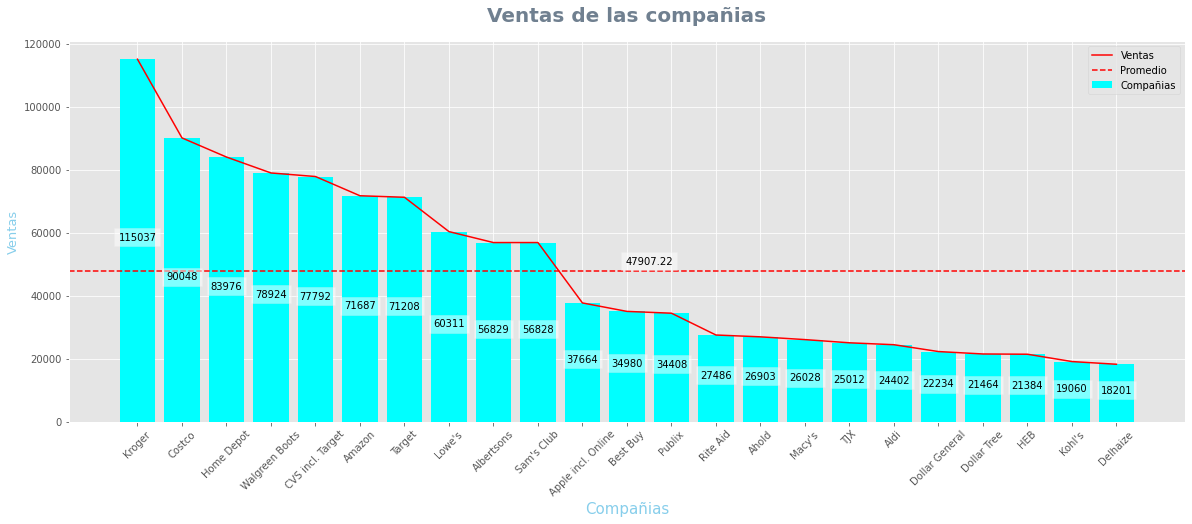

In [18]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2,y[i], horizontalalignment="center",
                 bbox = dict(facecolor = 'white', alpha = .5))

plt.style.use('ggplot')
company_names = df['company'].values
sales = df['sales'].values

fig, axis = plt.subplots()
fig.set_size_inches(20, 7)
axis.bar(company_names, sales, color="cyan")
axis.plot(company_names, sales, color="red")
plt.axhline(sales.mean(), color="r", linestyle="--")
plt.xticks(rotation=45)
plt.legend(['Ventas', 'Promedio','Compañias'])
plt.style.use('ggplot')
axis.text(
    len(company_names)/2, sales.mean() + 2000, round(47907.217391304344,2), 
    horizontalalignment="center",bbox = dict(facecolor = 'white', alpha = .5))
plt.xlabel('Compañias', fontsize=15, color="skyblue")
plt.ylabel('Ventas', fontsize=13, color="skyblue")
plt.title('Ventas de las compañias', fontsize=20, color="slategrey", fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
addlabels(company_names, sales)

In [23]:
len(df[df['sales']>=sales.mean()])

10

In [24]:
len(df[df['sales'] < sales.mean()])

13

**Resultados:**
* la venta promedio de todas la empresas sin contar sin contar la compañia dominantes es : 47907.22


**Conclusiones:**
* 10 empresas estan por encima del promedio
* 13 empresas estan por debajo del promedio

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.]),
 [Text(-100000.0, 0, '−100000'),
  Text(0.0, 0, '0'),
  Text(100000.0, 0, '100000'),
  Text(200000.0, 0, '200000'),
  Text(300000.0, 0, '300000'),
  Text(400000.0, 0, '400000'),
  Text(500000.0, 0, '500000'),
  Text(600000.0, 0, '600000'),
  Text(700000.0, 0, '700000')])

<Figure size 1368x576 with 0 Axes>

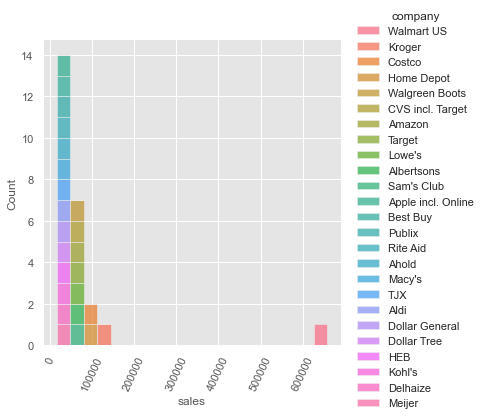

In [47]:
plt.figure(figsize=(19,8))
sns.displot(dataset, x = 'sales', hue = 'company', multiple='stack')
plt.xticks(rotation=65)

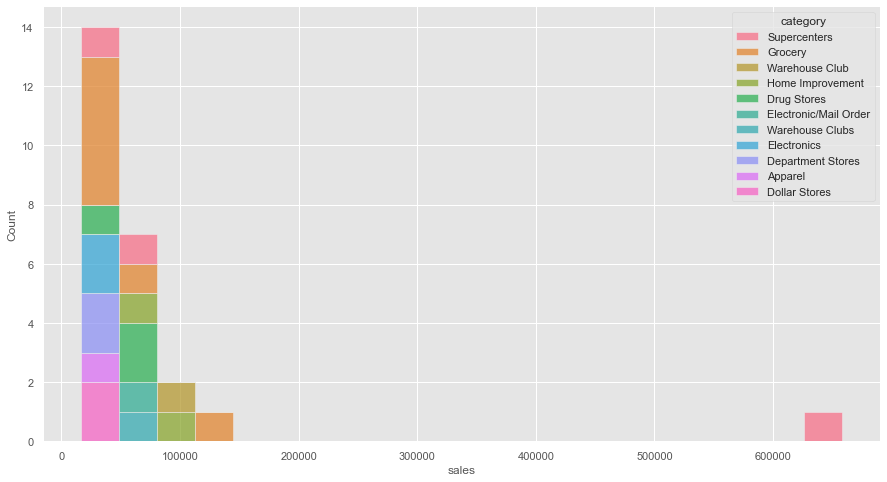

In [53]:
sns.histplot(dataset, x='sales',  hue='category', multiple='stack')
plt.show()

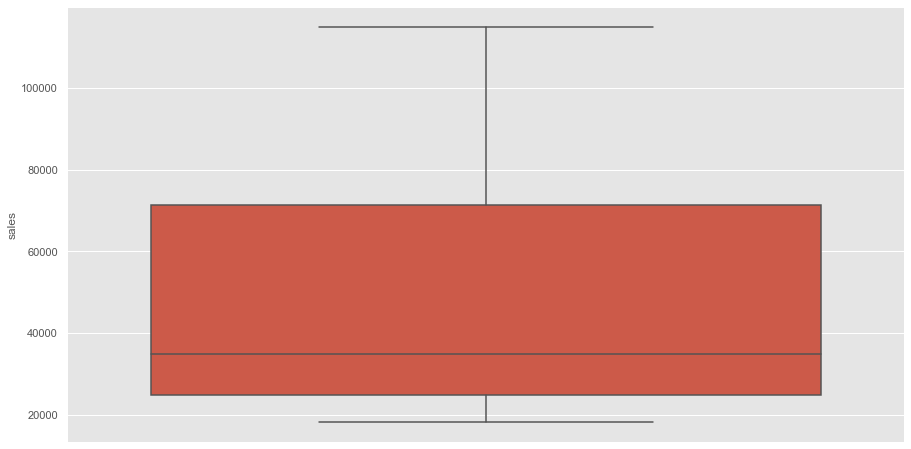

In [58]:
sns.boxplot( y=df["sales"])
plt.show()

In [49]:
len(dataset[dataset['sales'] < 50000])

14

In [59]:
Q1 = df['sales'].quantile(q=0.25)
Q2 = df['sales'].quantile(q=0.5)
Q3 = df['sales'].quantile(q=0.75)

Q1, Q2, Q3

(24707.0, 34980.0, 71447.5)

**Resultados:**
* 14 de las 25 compañias no generaron ingresos mayores a 50000 millones de Dolares
* el rango de dinero en ventas donde la mayoria de la compñias estan es 24707.0 y 71447.5


**Conclusiones:**
* la categoria con mas ventas es Grocery

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

231

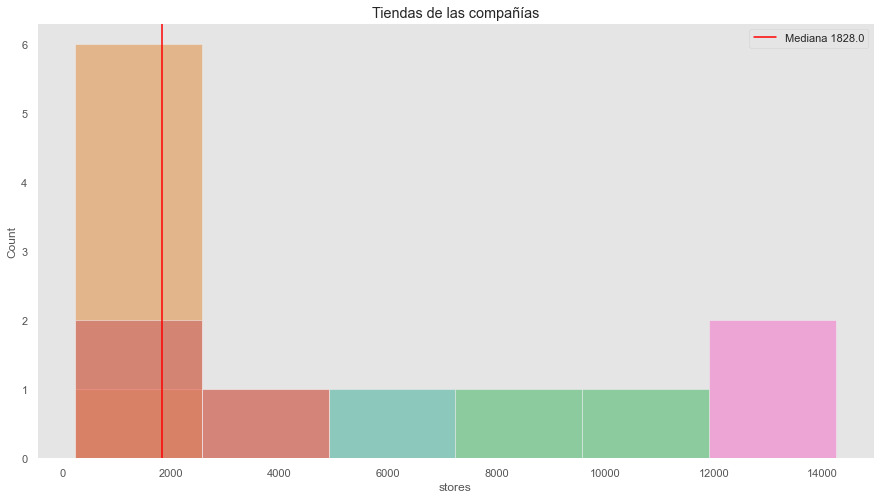

In [87]:
#sns.histplot(data= dataset , x='stores')

fig,ax= plt.subplots()
mediana = dataset['stores'].median()
sns.histplot(data=dataset,x='stores', hue='category')
ax.axvline(mediana,0,10,color='red',label='Mediana %s'%mediana)
ax.grid()
ax.legend()
plt.title('Tiendas de las compañías')
dataset.stores.min()

<AxesSubplot:xlabel='stores'>

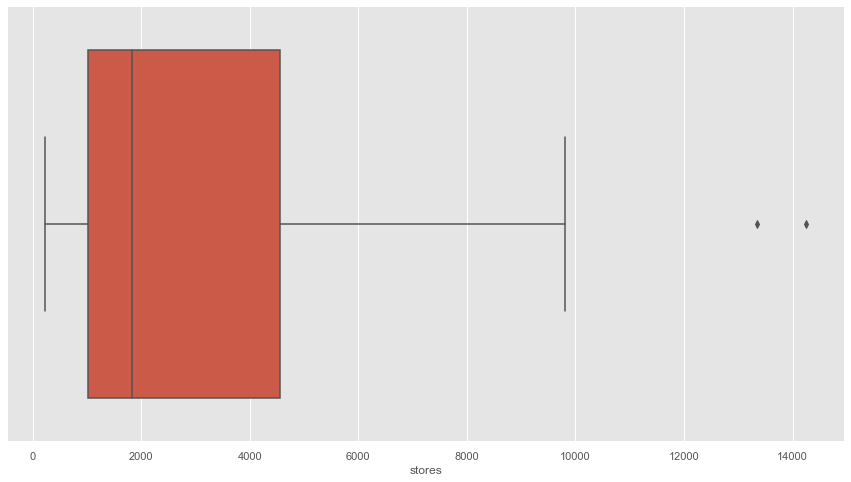

In [66]:
sns.boxplot(dataset['stores'])

In [76]:
Q1 = df['stores'].quantile(q=0.25)
Q2 = df['stores'].quantile(q=0.5)
Q3 = df['stores'].quantile(q=0.75)

Q1, Q2, Q3

(1095.5, 1828.0, 4242.0)

**Resultados:**
* la mayoria de las compañias tienen entre 1095 y 4242 tiendas


**Conclusiones:**
* la mediana de todas las cantidades de tiendas por compañia es 1828.0

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

<AxesSubplot:xlabel='stores', ylabel='sales'>

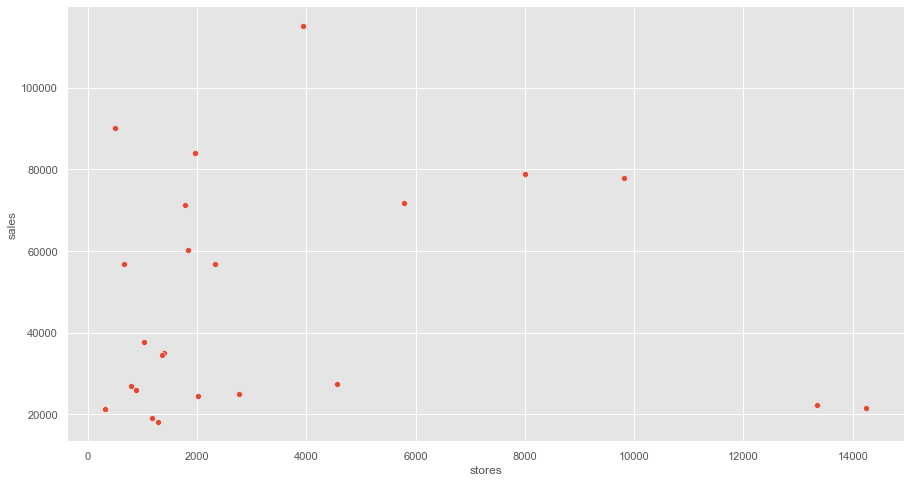

In [89]:
sns.scatterplot(data=df, x = 'stores', y = 'sales')

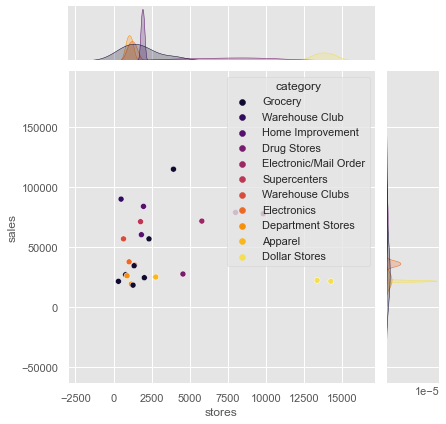

In [92]:
sns.jointplot(data=df, x = 'stores', y = 'sales', hue = 'category', palette='inferno')

<AxesSubplot:>

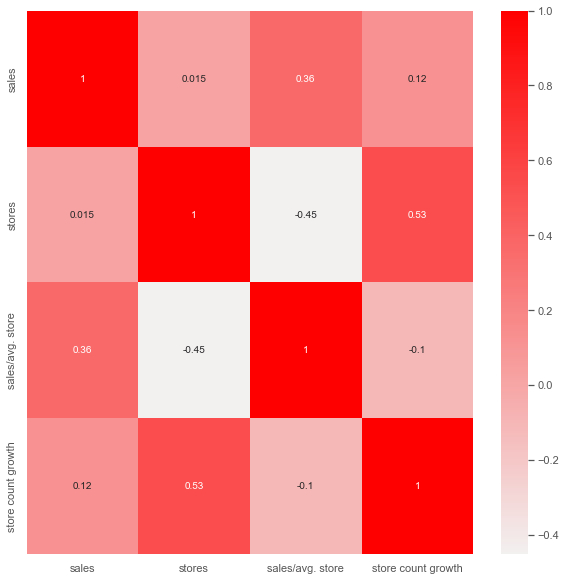

In [96]:
plt.figure(figsize=(10,10))
corr = df.corr()
cmap = sns.color_palette("light:red", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)

**Resultados:**
* la cantidad de tiendas no esta relacionada con la cantidad de ventas


**Conclusiones:**
* tener mas tiendas no significa tener mas ventas

### 5. ¿Cuál es el rango que existe entre las ventas?

In [94]:
rango = df['sales'].max()-df['sales'].min()
rango

96836

**Resultados:**
* el rango de ventas sin contar a Walmart, que es el valor atipico, es 96836 millones de dolares


**Conclusiones:**
* se deb tener en cuenta que el rango es mejor calcular sin un valor atipico ya que generaria un sesgo enermo

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

In [99]:
range_sales = df['sales'].max() - df['sales'].min()
range_sales

96836

C:\Users\joel_\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales'>

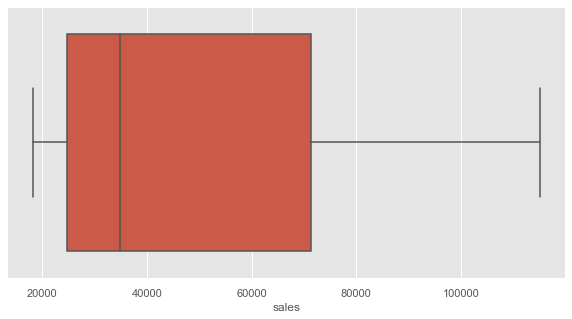

In [101]:
plt.figure(figsize=(10,5)); 
sns.boxplot(df['sales'])

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

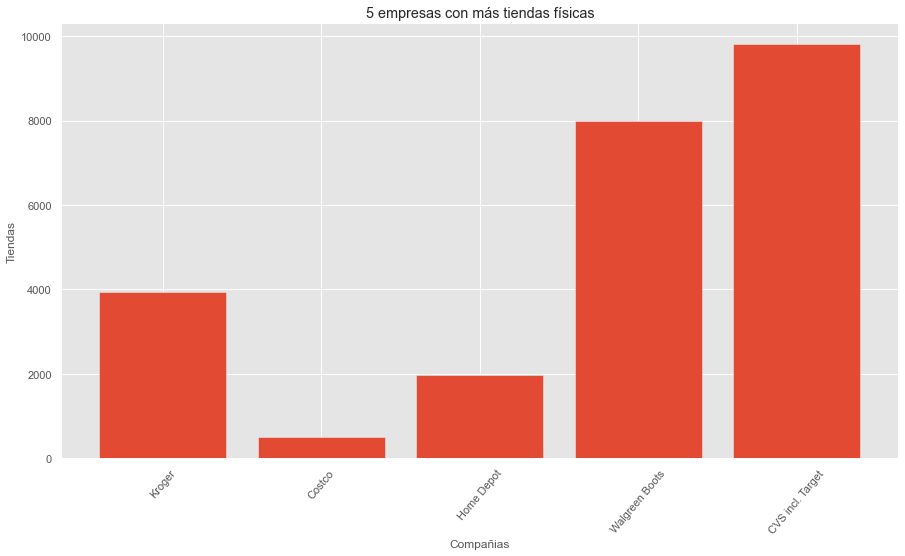

In [105]:
plt.bar(df['company'][0:5], df['stores'][0:5])
plt.title('5 empresas con más tiendas físicas')
plt.xlabel('Compañias')
plt.ylabel('Tiendas')
plt.xticks(rotation=50) 

**Resultados:**
* 2 de las empresas con más número de tiendas están dentro de las 5 que más ventas tuvieron: CVS incl. Target y Walgreen Boots



## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

**Resultados:**
* la venta promedio de todas la empresas sin contar sin contar la compañia dominantes es : 47907.22


**Conclusiones:**
* 10 empresas estan por encima del promedio
* 13 empresas estan por debajo del promedio

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

**Resultados:**
* la venta promedio de todas la empresas sin contar sin contar la compañia dominantes es : 47907.22


**Conclusiones:**
* 10 empresas estan por encima del promedio
* 13 empresas estan por debajo del promedio

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

**Resultados:**
* la venta promedio de todas la empresas sin contar sin contar la compañia dominantes es : 47907.22


**Conclusiones:**
* 10 empresas estan por encima del promedio
* 13 empresas estan por debajo del promedio

## III. Tus propias preguntas

### 10. Pregunta

**Resultados:**
* la venta promedio de todas la empresas sin contar sin contar la compañia dominantes es : 47907.22


**Conclusiones:**
* 10 empresas estan por encima del promedio
* 13 empresas estan por debajo del promedio

### 11. Pregunta

**Resultados:**
* la venta promedio de todas la empresas sin contar sin contar la compañia dominantes es : 47907.22


**Conclusiones:**
* 10 empresas estan por encima del promedio
* 13 empresas estan por debajo del promedio

### 12. Pregunta

**Resultados:**
* la venta promedio de todas la empresas sin contar sin contar la compañia dominantes es : 47907.22


**Conclusiones:**
* 10 empresas estan por encima del promedio
* 13 empresas estan por debajo del promedio

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9312602b-e77f-42bf-b1f9-9ddfe915a1e6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>